<div style="background-color:#3c3d41;padding:30px;border-radius:5px">

<h1 style="font-size:22px;color:white;margin-top:0px">
How to read and plot NOAA VIIRS I-Band Active Fire Products with python ?
</h1>

<p style="font-size:14px;color:white">
Author: Benjamin Marchant<br>
License: CC BY 4.0
</p>
  
</div>

In [1]:
from matplotlib.pyplot import figure
from datetime import date
from os import path

import pprint
import os
import glob
import netCDF4
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
import numpy as np
import numpy.ma as ma
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
file_name = "AF-Iband_v1r0_npp_s202207201235304_e202207201236546_c202207201313506.nc"

In [3]:
f = netCDF4.Dataset(file_name)

#for key in f.__dict__.keys(): print(key)

print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.5
    Metadata_Conventions: CF-1.5, Unidata Datasset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (version 17, 24 March 2011)
    project: NPP Data Exploitation
    institution: DOC/NOAA/NESDIS/NDE > Office of Satellite and Product Operations, NESDIS, NOAA, U.S. Department of Commerce
    naming_authority: gov.noaa.nesdis.ncei
    satellite_name: S-NPP
    platform: S-NPP
    instrument_name: VIIRS
    instrument: VIIRS
    title: AF-Iband
    summary: Active Fires EDR: fire mask, qa and list of fire pixels
    history: AF I-Band Version 1.0 (equal to offline vfire375 version 2.5.4)
    processing_level: NOAA Level 2
    cdm_data_type: swath
    creator_name: DOC/NOAA/NESDIS/STAR > AF Algorithm Team, Center for Satellite Applications and Research, NESDIS, NOAA, U.S. Department of Commerce
    creator_email: espcoperations@noaa.gov
    creator_url: http://ww

In [7]:
for key in f.__dict__.keys(): print(key)

Conventions
Metadata_Conventions
standard_name_vocabulary
project
institution
naming_authority
satellite_name
platform
instrument_name
instrument
title
summary
history
processing_level
cdm_data_type
creator_name
creator_email
creator_url
publisher_name
publisher_email
publisher_url
source
SVI01
SVI02
SVI03
SVI04
SVI05
SVM13
IVCDB
GITCO
LWMSK
ProcessVersionNumber
ExecutableCreationDate
ExecutableCreationTime
SystemID
id
metadata_link
start_orbit_number
end_orbit_number
ascend_descend_data_flag
time_coverage_start
time_coverage_end
date_created
geospatial_first_scanline_first_fov_lat
geospatial_first_scanline_last_fov_lat
geospatial_last_scanline_first_fov_lat
geospatial_last_scanline_last_fov_lat
geospatial_first_scanline_first_fov_lon
geospatial_first_scanline_last_fov_lon
geospatial_last_scanline_first_fov_lon
geospatial_last_scanline_last_fov_lon
geospatial_lat_units
geospatial_lon_units
geospatial_bounds
day_night_data_flag
FirePix
DayPix
NightPix
LandPix
WaterPix
MissingPix
GlintPi

In [46]:
f.source

'SVI01, SVI02, SVI03, SVI04, SVI05, SVM13, IVCDB, GITCO, LWMSK'

In [47]:
f.SVI01

'SVI01_npp_d20220720_t1235304_e1236546_b55588_c20220720131126000096_oebc_ops.h5'

In [9]:
f.day_night_data_flag

1

In [10]:
lats = [f.geospatial_first_scanline_first_fov_lat,
        f.geospatial_first_scanline_last_fov_lat,
        f.geospatial_last_scanline_first_fov_lat,
        f.geospatial_last_scanline_last_fov_lat]

longs = [f.geospatial_first_scanline_first_fov_lon,
        f.geospatial_first_scanline_last_fov_lon,
        f.geospatial_last_scanline_first_fov_lon,
        f.geospatial_last_scanline_last_fov_lon]

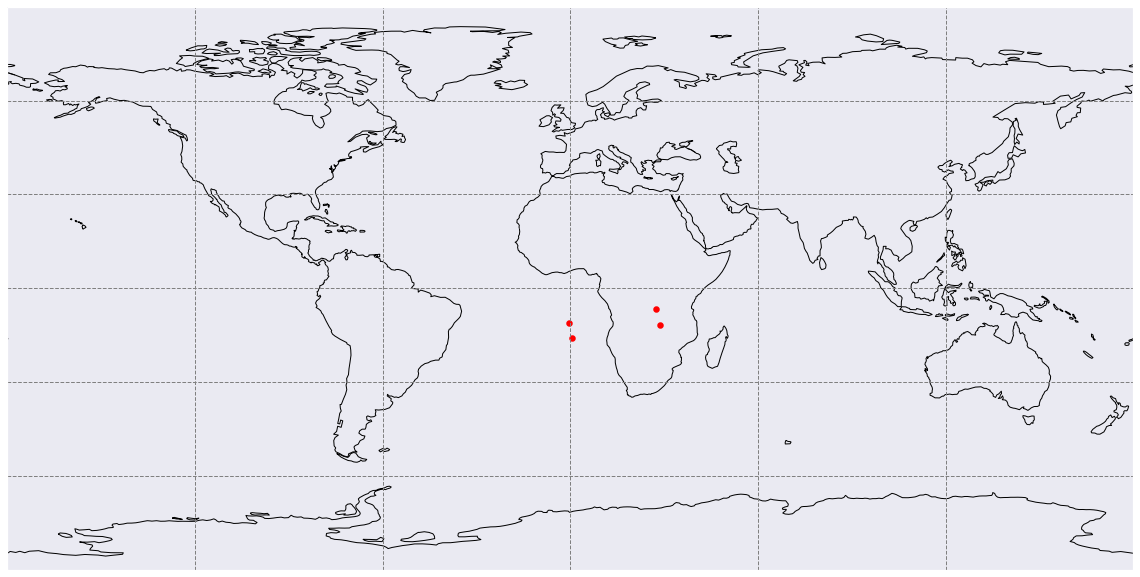

<function matplotlib.pyplot.close(fig=None)>

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import cartopy.crs as ccrs


plt.figure(figsize=(16,9))

proj = ccrs.PlateCarree()

ease_extent = [-180., 180., 90., -90.]

ax = plt.axes(projection=proj)

ax.set_extent(ease_extent, crs=proj) 

ax.gridlines(color='gray', linestyle='--')

ax.coastlines()



plt.scatter( longs, lats,
         color='red', linewidth=2, marker='o', s=20,
         transform=ccrs.PlateCarree(),
         )

plt.tight_layout()

plt.show()

plt.close

## Fire Mask

In [12]:
fmg = f.groups['Fire Mask']

fmg

<class 'netCDF4._netCDF4.Group'>
group /Fire Mask:
    dimensions(sizes): row(1536), col(6400)
    variables(dimensions): uint8 fire_mask(row,col), uint32 fire_qa(row,col), |S1 quality_information()
    groups: 

In [13]:
for key in fmg.variables.keys():
    print(key)

fire_mask
fire_qa
quality_information


### Variable: Fire Mask

<div class="alert alert-warning">

Missing – 0
Missing input data

Scan – 1 
On-board bowtie deletion

Other – 2 (M-band)
Sun glint – 2 (I-band)
Not processed (obsolete) (M-band)
Pixel classified as sun glint (I-band)

Water – 3
Pixel classified as non-fire water

Cloud – 4
Pixel classified as cloudy

No Fire – 5
Pixel classified as non-fire land

Unknown – 6
Pixel with no valid background pixels

Fire Low – 7
Fire pixel with confidence strictly less than 20% fire

Fire Medium – 8
Fire pixel with confidence between 20% and 80%

Fire High – 9
Fire pixel with confidence greater than or equal to 80%

</div>

In [14]:
fire_mask_v = fmg.variables['fire_mask']

fire_mask_v

<class 'netCDF4._netCDF4.Variable'>
uint8 fire_mask(row, col)
    long_name: fire mask
    legend: 
0 not-processed (non-zero QF)
1 bowtie
2 glint
3 water
4 clouds
5 clear land
6 unclassified fire pixel
7 low confidence fire pixel
8 nominal confidence fire pixel
9 high confidence fire pixel

path = /Fire Mask
unlimited dimensions: 
current shape = (1536, 6400)
filling on, default _FillValue of 255 ignored

In [15]:
fire_mask_v.legend

'\n0 not-processed (non-zero QF)\n1 bowtie\n2 glint\n3 water\n4 clouds\n5 clear land\n6 unclassified fire pixel\n7 low confidence fire pixel\n8 nominal confidence fire pixel\n9 high confidence fire pixel\n'

In [16]:
data =  ma.getdata(fire_mask_v)

print( data.shape )
print( data )

(1536, 6400)
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


[]

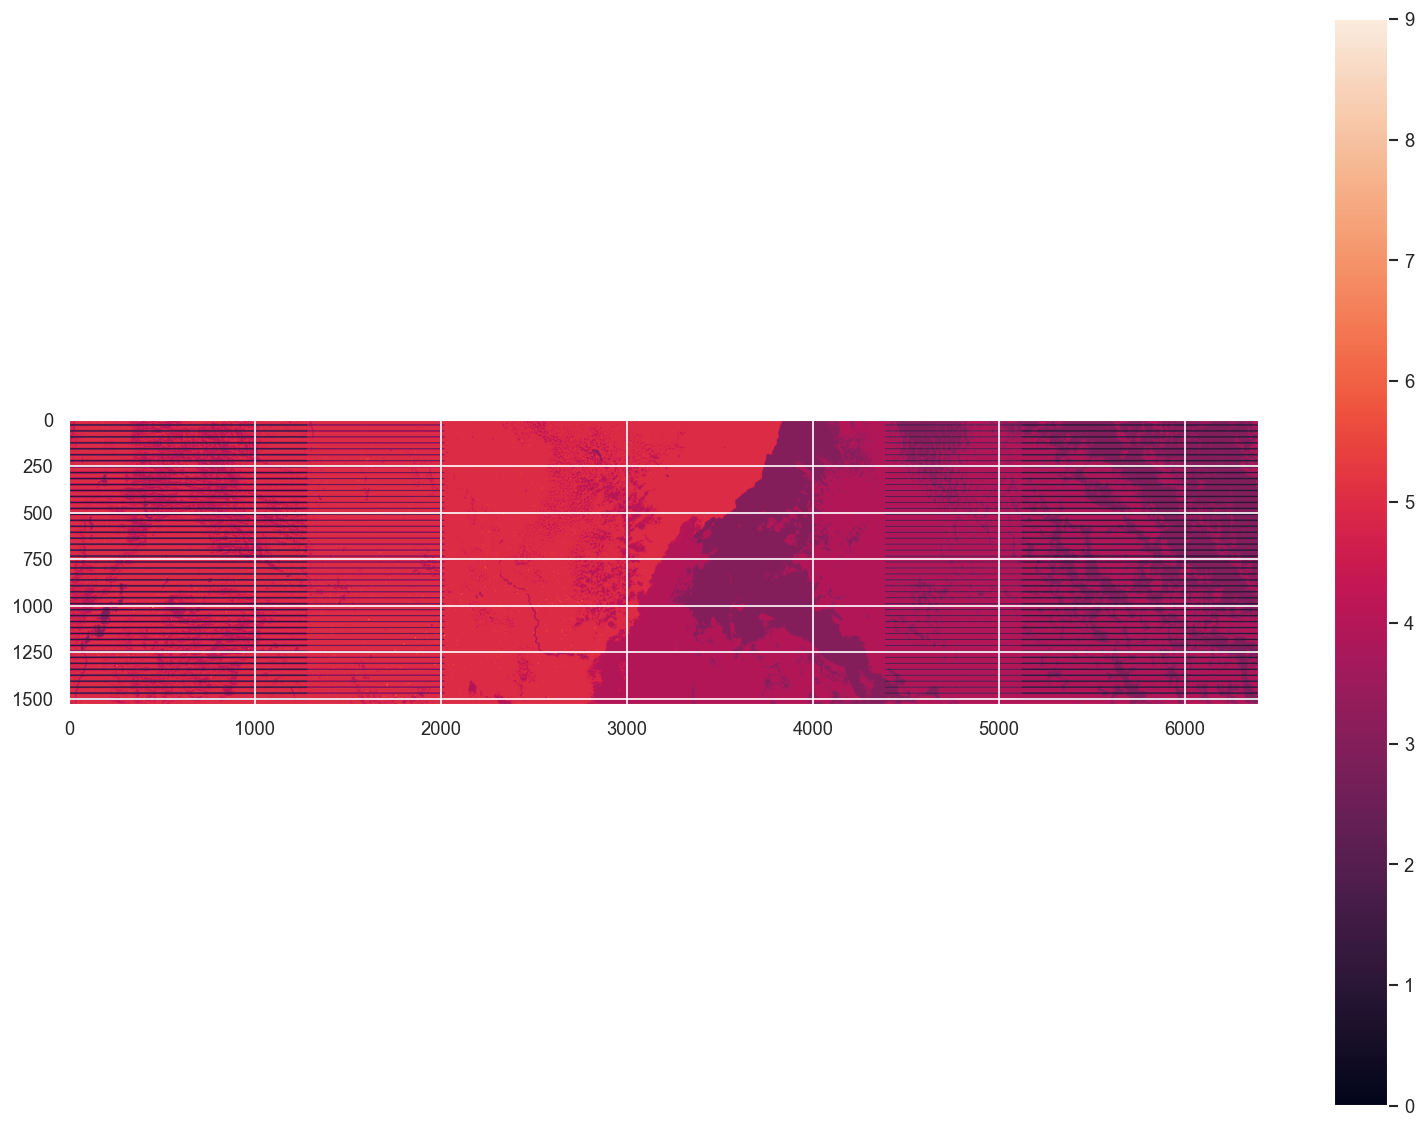

In [17]:
fig = plt.figure(num=None, figsize=(16, 12), dpi=120, facecolor='w', edgecolor='k')

plt.imshow(data)

plt.colorbar()

plt.plot()

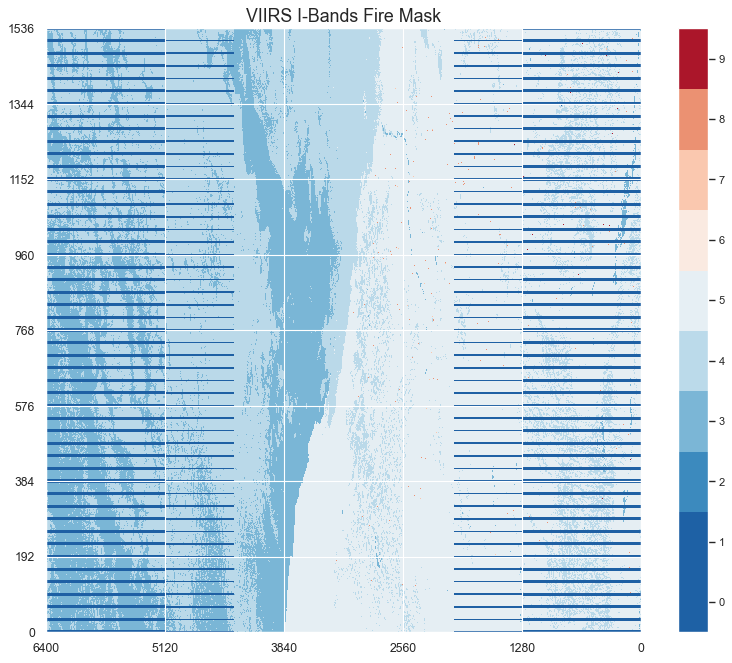

In [18]:
def plot_VIIRS_IBands_Fire_Mask(data):
    data_shape = data.shape
    figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
    cmap = sns.color_palette('RdBu_r', n_colors=10)
    cmap = mpl.colors.ListedColormap(cmap)
    bounds = [-0.5, 1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    img = plt.imshow(np.fliplr(data), cmap=cmap, norm=norm,interpolation='none', origin='lower', aspect='auto')
    cbar_bounds = [-0.5,0.5, 1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5]
    cbar_ticks = [0,1,2,3,4,5,6,7,8,9]               
    cbar = plt.colorbar(img, cmap=cmap, norm=norm, boundaries=cbar_bounds, ticks=cbar_ticks)
    cbar.ax.set_yticklabels(cbar_ticks, fontsize=10)
    plt.title('VIIRS I-Bands Fire Mask', fontsize=16)
    l = [int(i) for i in np.linspace(0,data_shape[1],6)]
    plt.xticks(l, [i for i in reversed(l)], rotation=0, fontsize=11 )
    l = [int(i) for i in np.linspace(0,data_shape[0],9)]
    plt.yticks(l, l, rotation=0, fontsize=11 )
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.show()
    return None

plot_VIIRS_IBands_Fire_Mask(data)

### Variable: Fire Mask QA

In [19]:
fire_qa_v = fmg.variables['fire_qa']

print(fire_qa_v)

<class 'netCDF4._netCDF4.Variable'>
uint32 fire_qa(row, col)
    long_name: algorithm QA
    units: bit field
path = /Fire Mask
unlimited dimensions: 
current shape = (1536, 6400)
filling on, default _FillValue of 4294967295 used


In [20]:
data =  ma.getdata(fire_qa_v)

print( data.shape )
print( data )

(1536, 6400)
[[95 95 95 ... 95 95 95]
 [95 95 95 ... 95 95 95]
 [95 95 95 ... 95 95 95]
 ...
 [95 95 95 ... 95 95 95]
 [95 95 95 ... 95 95 95]
 [95 95 95 ... 95 95 95]]


Fire Algorithm QA Mask (32-bit unsigned integer) I-band Active Fire Product content (ref: [Validated Maturity Science Review For VIIRS 750m and 375m Active Fire algorithms](https://www.star.nesdis.noaa.gov/jpss/documents/AMM/N20/Land_ActiveFires_Validated.pdf)):

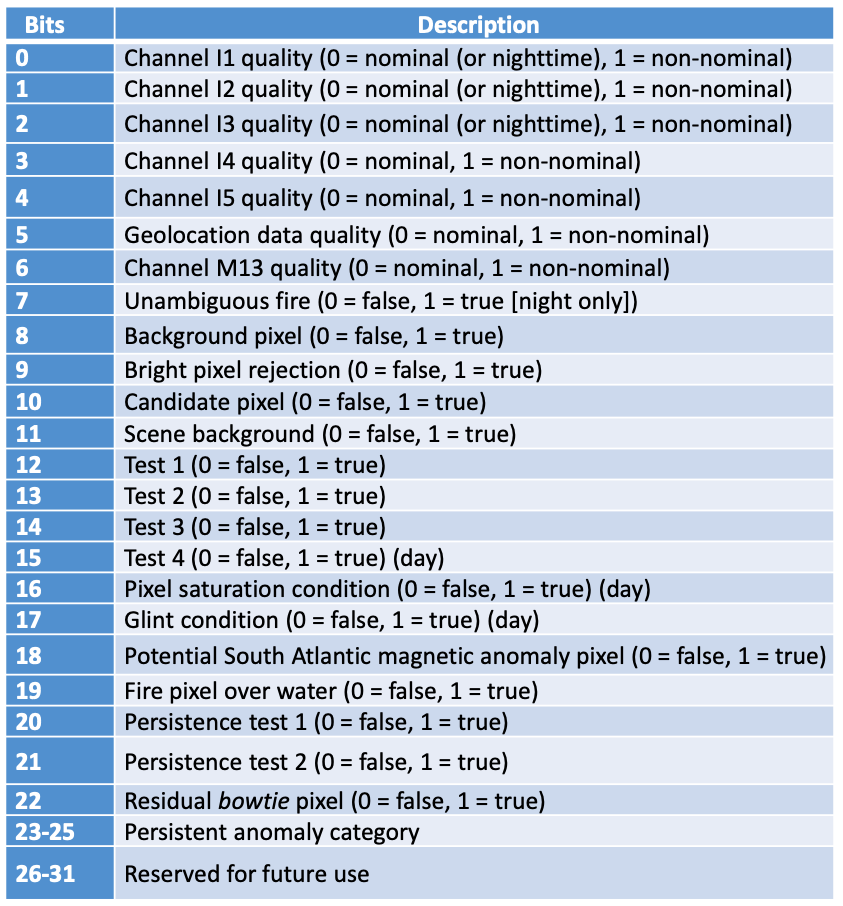

In [21]:
def bits_stripping(bit_start,bit_count,value):
    bitmask=pow(2,bit_start+bit_count)-1
    return np.right_shift(np.bitwise_and(value,bitmask),bit_start)

In [22]:
bits_stripping(12,1,data[:,:])

masked_array(
  data=[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],
  mask=False,
  fill_value=999999,
  dtype=uint32)

In [23]:
fire_qa_df = pd.DataFrame(columns=[])

In [24]:
fire_qa_df['Fire Mask QA TEST 1'] = bits_stripping(12,1,data[:,:]).ravel()

fire_qa_df

,Fire Mask QA TEST 1
0,0
1,0
2,0
3,0
4,0
...,...
9830395,0
9830396,0
9830397,0
9830398,0


In [25]:
fire_qa_df['Fire Mask QA TEST 1'].value_counts()

0    9825346
1       5054
Name: Fire Mask QA TEST 1, dtype: int64

<div class="alert alert-warning">
FP Persistent Anomaly Category:

- 0: no persistent anomaly 
- 1: oil or gas flare
- 2: volcano
- 3: solar panel
- 4: urban (currently not used) 
- 5: unclassified
</div>

In [26]:
fire_qa_df['Persistent anomaly category'] = bits_stripping(23,3,data[:,:]).ravel()

fire_qa_df

,Fire Mask QA TEST 1,Persistent anomaly category
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
9830395,0,0
9830396,0,0
9830397,0,0
9830398,0,0


In [27]:
fire_qa_df['Persistent anomaly category'].value_counts()

0    9830400
Name: Persistent anomaly category, dtype: int64

### Variable: Quality Information

In [28]:
quality_information_v = fmg.variables['quality_information']

quality_information_v

<class 'netCDF4._netCDF4.Variable'>
|S1 quality_information()
    long_name: total_number_retrievals, percentage_optimal_retrievals, percentage_bad_retrievals
    total_number_retrievals: 5195
    percentage_optimal_retrievals: 88.81617
    percentage_bad_retrievals: 11.18383
path = /Fire Mask
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of   used

In [29]:
for key in quality_information_v.__dict__.keys(): print(key)

long_name
total_number_retrievals
percentage_optimal_retrievals
percentage_bad_retrievals


In [30]:
quality_information_v.total_number_retrievals

5195

In [31]:
type(quality_information_v)

netCDF4._netCDF4.Variable

## Fire Pixels

In [32]:
fpg = f.groups['Fire Pixels']

fpg

<class 'netCDF4._netCDF4.Group'>
group /Fire Pixels:
    dimensions(sizes): nfire(5195)
    variables(dimensions): uint16 FP_line(nfire), uint16 FP_sample(nfire), float32 FP_latitude(nfire), float32 FP_longitude(nfire), float32 FP_T4(nfire), float32 FP_T5(nfire), float32 FP_MeanT4(nfire), float32 FP_MeanT5(nfire), float32 FP_MeanDT(nfire), float32 FP_MAD_T4(nfire), float32 FP_MAD_T5(nfire), float32 FP_MAD_DT(nfire), float32 FP_power(nfire), float32 FP_Rad13(nfire), float32 FP_MeanRad13(nfire), uint16 FP_AdjCloud(nfire), uint16 FP_AdjWater(nfire), uint16 FP_WinSize(nfire), uint8 FP_confidence(nfire), uint8 FP_day(nfire), float32 FP_SolZenAng(nfire), float32 FP_SolAzAng(nfire), float32 FP_ViewZenAng(nfire), float32 FP_ViewAzAng(nfire), uint8 FP_PersistentAnomalyCategory(nfire)
    groups: 

In [33]:
for key in fpg.variables.keys():
    print(key)

FP_line
FP_sample
FP_latitude
FP_longitude
FP_T4
FP_T5
FP_MeanT4
FP_MeanT5
FP_MeanDT
FP_MAD_T4
FP_MAD_T5
FP_MAD_DT
FP_power
FP_Rad13
FP_MeanRad13
FP_AdjCloud
FP_AdjWater
FP_WinSize
FP_confidence
FP_day
FP_SolZenAng
FP_SolAzAng
FP_ViewZenAng
FP_ViewAzAng
FP_PersistentAnomalyCategory


In [34]:
Fire_Pixels_Variables = [key for key in fpg.variables.keys()]

Fire_Pixels_Variables

['FP_line',
 'FP_sample',
 'FP_latitude',
 'FP_longitude',
 'FP_T4',
 'FP_T5',
 'FP_MeanT4',
 'FP_MeanT5',
 'FP_MeanDT',
 'FP_MAD_T4',
 'FP_MAD_T5',
 'FP_MAD_DT',
 'FP_power',
 'FP_Rad13',
 'FP_MeanRad13',
 'FP_AdjCloud',
 'FP_AdjWater',
 'FP_WinSize',
 'FP_confidence',
 'FP_day',
 'FP_SolZenAng',
 'FP_SolAzAng',
 'FP_ViewZenAng',
 'FP_ViewAzAng',
 'FP_PersistentAnomalyCategory']

In [35]:
FP_latitude_v = fpg.variables['FP_latitude']

FP_latitude_v

<class 'netCDF4._netCDF4.Variable'>
float32 FP_latitude(nfire)
    long_name: latitude of fire pixel
path = /Fire Pixels
unlimited dimensions: 
current shape = (5195,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [36]:
data =  ma.getdata(FP_latitude_v)

print( data.shape )
print( data )

(5195,)
[-14.05129  -13.887011 -13.952926 ...  -8.540777  -8.274449  -8.571487]


In [37]:
FP_power_v = fpg.variables['FP_power']

FP_power_v

<class 'netCDF4._netCDF4.Variable'>
float32 FP_power(nfire)
    long_name: fire radiative power
    units: MW
path = /Fire Pixels
unlimited dimensions: 
current shape = (5195,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [38]:
ma.getdata( fpg.variables['FP_SolZenAng'] )

masked_array(data=[41.325466, 41.747585, 41.56037 , ..., 38.290325,
                   39.091927, 38.181976],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [39]:
FP_PersistentAnomalyCategory_v = fpg.variables['FP_PersistentAnomalyCategory']

FP_PersistentAnomalyCategory_v

<class 'netCDF4._netCDF4.Variable'>
uint8 FP_PersistentAnomalyCategory(nfire)
    long_name: persistent industrial or nature source
    legend: 
0 none
1 oil or gas
2 volcano
3 solar panel
4 urban
5 unclassified

path = /Fire Pixels
unlimited dimensions: 
current shape = (5195,)
filling on, default _FillValue of 255 ignored

In [40]:
data =  ma.getdata(FP_PersistentAnomalyCategory_v)

print( data.shape )
print( data )

(5195,)
[0 0 0 ... 0 0 0]


## Metadata for OSPO Monitoring Tool

In [41]:
metag = f.groups['Metadata for OSPO Monitoring Tool']

metag

<class 'netCDF4._netCDF4.Group'>
group /Metadata for OSPO Monitoring Tool:
    dimensions(sizes): 
    variables(dimensions): int32 max_detections_row(), int32 max_detections_col(), float32 fire_mask_0(), float32 fire_mask_4(), float32 fire_mask_7(), float32 fire_mask_8(), float32 fire_mask_9(), float32 mean_frp(), float32 total_frp(), int32 number_of_detections()
    groups: 

In [42]:
for key in metag.variables.keys():
    print(key)

max_detections_row
max_detections_col
fire_mask_0
fire_mask_4
fire_mask_7
fire_mask_8
fire_mask_9
mean_frp
total_frp
number_of_detections


In [43]:
metag['mean_frp']

<class 'netCDF4._netCDF4.Variable'>
float32 mean_frp()
    long_name: mean fire radiative power
    units: MW
path = /Metadata for OSPO Monitoring Tool
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used

In [44]:
metag.variables['mean_frp']

<class 'netCDF4._netCDF4.Variable'>
float32 mean_frp()
    long_name: mean fire radiative power
    units: MW
path = /Metadata for OSPO Monitoring Tool
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used

In [45]:
max_detections_row_v = metag.variables['max_detections_row']

max_detections_row_v

<class 'netCDF4._netCDF4.Variable'>
int32 max_detections_row()
    long_name: count of the maximum number of fire detections of any scan line
    units: count
path = /Metadata for OSPO Monitoring Tool
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used

## References

    
- [NOAA JPSS Visible Infrared Imaging Radiometer Suite (VIIRS) Active Fires Environmental Data Record (EDR) from NDE](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc:C00971) 
- [Oak Fire Incident](https://www.fire.ca.gov/incidents/2022/7/22/oak-fire/)  
- [JPSS/SNPP Algorithm Maturity Matrix](https://www.star.nesdis.noaa.gov/jpss/AlgorithmMaturity.php)
- [Validated Maturity Science Review For VIIRS 750m and 375m Active Fire algorithms](https://www.star.nesdis.noaa.gov/jpss/documents/AMM/N20/Land_ActiveFires_Validated.pdf) 
- [STAR JPSS Science Documents](https://www.star.nesdis.noaa.gov/jpss/Docs.php#S612872)